In [1]:
from scratch.linear_algebra import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
    return dot(x, beta)

In [2]:
from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x, y, beta) -> float:
    return error(x, y, beta)**2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4]

In [4]:
assert error(x,y,beta) == -6

In [5]:
assert squared_error(x, y, beta) == 36

In [6]:
def sqerror_gradiant(x: Vector, y: float, beta: Vector):
    err = error(x, y, beta)
    return [2*err*x_i for x_i in x]

In [7]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    guess = [random.random() for _ in xs[0]]
    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]
            
            gradient = vector_mean([sqerror_gradiant(x, y, guess) for  x, y in zip(batch_xs, batch_ys)])
            
            guess = gradient_step(guess, gradient, -learning_rate)
            
    return guess

                                

### 부트스트랩

In [8]:
from typing import TypeVar, Callable

X = TypeVar('X')
Stat = TypeVar('Stat')

def bootstrap_sample(data: List[X]) -> List[X]:
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [9]:
close_to_100 = [99.5 + random.random() for _ in range(101)]

In [11]:
far_from_100 = ([99.5 + random.random()] +
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

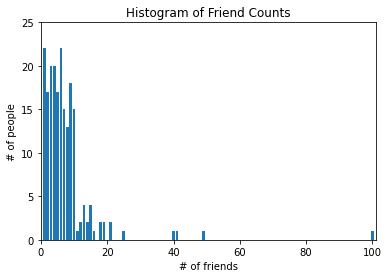

In [12]:
from scratch.statistics import median, standard_deviation

medians_close = bootstrap_statistic(close_to_100, median, 100)

medians_far = bootstrap_statistic(far_from_100, median, 100)

assert standard_deviation(medians_close) < 1
assert standard_deviation(medians_far) > 90

### Regularization

In [13]:
def ridgo_penalty(beta: Vector, alpha: float) -> float:
    return alpha* dot(beta[1:], beta[1:])

def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    return error(x, y, beta)**2 + ridgo_penalty(beta, alpha)

In [14]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])